In [9]:
import pandas as pd
import random
import spacy
from spacy.training import Example
from spacy.pipeline.ner import DEFAULT_NER_MODEL
import re
from time import sleep
import re
from spacy import logger
from spacy import displacy

import spacy.training
from spacy.tokens import DocBin

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [10]:
training_file = 'training.txt'
testing_file  = 'test.txt'
development_file  = 'development.txt'

In [11]:
with open(training_file, "r") as train_file:
    training_data = train_file.read()

with open(testing_file, "r") as test_file:
    testing_data = test_file.read()

with open(development_file, "r") as development_file:
    development_data = development_file.read()

To Bifuricate the text based on the : title and Paragraph : 

In [12]:
# For Train set : 
ctr = 0
train = []
for line in training_data.split("\n\n"):
  train.append(line)

# For Test Set : 
ctr = 0
test = []
for line in testing_data.split("\n\n"):
  test.append(line)

# For Development Set : 
development  = []
for line in development_data.split("\n\n"):
  development.append(line)

In [13]:
print(train[0])

227508|t|Naloxone reverses the antihypertensive effect of clonidine.
227508|a|In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism sugg

In [14]:
### Extracting the title and the paragraph for the text train and development :
try:

  def article_extractor(text):
    article = re.findall(r'a\|(.*)\n' , text)
    return article[0]

  def title_extractor(text):
    title = re.findall(r't\|(.*)\n' , text)
    return title[0]

except Exception as e:
  pass


In [15]:
train_article  = []
test_article  = []
development_article = []

def appender(initial_list ,  final_list):
    try:
        for i in initial_list:
            final_list.append(title_extractor(i) + ' ' + article_extractor(i))
    except Exception as Error:
        print(Error)


appender(train , train_article)
appender(test , test_article)
appender(development , development_article)


list index out of range
list index out of range


In [16]:
print(train_article[0])
print(test_article[0])
print(development_article[0])

Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release o

While we successfully have extracted the title and the paragraph from the datset we have to get the labels from the datset and store it accordingly : 

In [17]:
try:
  def get_labels(text):
    l  = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3]))
      except Exception as e:
        pass
    return labels


  def get_labels_and_entity(text):
    l = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3], i[2]))
      except Exception as e:
        pass
    return labels
except Exception as e:
  pass

train_labels  = [get_labels(x) for x in train]
test_labels = [get_labels(x) for x in test]
development_labels  = [get_labels(x) for x in development]

train_labels = [{"entities": entry} for entry in train_labels]
test_labels = [{"entities": entry} for entry in test_labels] 
development_labels =[{"entities": entry} for entry in development_labels] 

In [18]:
train_labels[0]

{'entities': [(0, 8, 'Chemical'),
  (49, 58, 'Chemical'),
  (93, 105, 'Disease'),
  (181, 190, 'Chemical'),
  (244, 252, 'Chemical'),
  (274, 285, 'Disease'),
  (306, 322, 'Chemical'),
  (354, 362, 'Chemical'),
  (364, 372, 'Chemical'),
  (469, 481, 'Disease'),
  (487, 496, 'Chemical'),
  (563, 576, 'Chemical'),
  (589, 597, 'Chemical'),
  (637, 646, 'Chemical'),
  (671, 695, 'Chemical'),
  (750, 762, 'Disease'),
  (865, 873, 'Chemical'),
  (878, 887, 'Chemical'),
  (1026, 1035, 'Chemical'),
  (1039, 1055, 'Chemical')]}

Check the length of all the data sets prepared till now so that we can marge them and can them for the further processig :

In [19]:
# Check the length of the processed data sets : 
print("Train Dataset")
print(len(train_article))
print(len(train_labels))
print("Test Dataset")
print(len(test_article))
print(len(test_labels))
print("Development Dataset")
print(len(development_article))
print(len(development_labels))

Train Dataset
1000
1000
Test Dataset
500
501
Development Dataset
500
501


As we can see the labels in the test and development dataset have different values and with this anomaly we wont be able to make the df of the same so we would be dropping the last values of botht the labels ( train and developemt)

In [20]:
test_labels.pop()
development_labels.pop()

{'entities': []}

In [21]:
# Check the length of the processed data sets : 
print("Train Dataset")
print(len(train_article))
print(len(train_labels))
print("Test Dataset")
print(len(test_article))
print(len(test_labels))
print("Development Dataset")
print(len(development_article))
print(len(development_labels))

Train Dataset
1000
1000
Test Dataset
500
500
Development Dataset
500
500


Now all three datasets have the same count : we can make the df from the datsets and start trainning the machine learning models :

---------


### Next Steps and Methods : 

1. In this one we would be trying the Supervised learning approach and for spacy we can use the command line method to train the model : This includes to usage of config file for the training and the prameters, epoches all are mentioned in the config file only. 

2. Active Learning Approach - we would save the dataset in the form of Json format or in dictionary form and then define the blank model and feed the data in the NER pipeline with the active learning function. 

In [22]:
# Make the dataframe for all the train labels : development labels : test labels

train_df  = pd.DataFrame(train_article , columns=['article'])
train_df['labels'] = train_labels[:1000]

test_df  = pd.DataFrame(test_article , columns=['article'])
test_df['labels'] = test_labels[:500]

development_df  = pd.DataFrame(development_article , columns=['article'])
development_df['labels'] = development_labels[:500]


In [23]:
# Check the data frames for all the three dataframes : 

train_df.head()

,article,labels
0,Naloxone reverses the antihypertensive effect ...,"{'entities': [(0, 8, 'Chemical'), (49, 58, 'Ch..."
1,Lidocaine-induced cardiac asystole. Intravenou...,"{'entities': [(0, 9, 'Chemical'), (18, 34, 'Di..."
2,Suxamethonium infusion rate and observed fasci...,"{'entities': [(0, 13, 'Chemical'), (41, 55, 'D..."
3,"Galanthamine hydrobromide, a longer acting ant...","{'entities': [(0, 25, 'Chemical'), (111, 122, ..."
4,Effects of uninephrectomy and high protein fee...,"{'entities': [(54, 61, 'Chemical'), (70, 91, '..."


In [24]:
test_df.head()

,article,labels
0,Famotidine-associated delirium. A series of si...,"{'entities': [(0, 10, 'Chemical'), (22, 30, 'D..."
1,Indomethacin induced hypotension in sodium and...,"{'entities': [(0, 12, 'Chemical'), (21, 32, 'D..."
2,Late-onset scleroderma renal crisis induced by...,"{'entities': [(11, 35, 'Disease'), (47, 57, 'C..."
3,The risk and associated factors of methampheta...,"{'entities': [(35, 50, 'Chemical'), (51, 60, '..."
4,Cerebellar sensory processing alterations impa...,"{'entities': [(78, 97, 'Disease'), (110, 120, ..."


In [25]:
development_df.head()

,article,labels
0,Tricuspid valve regurgitation and lithium carb...,"{'entities': [(0, 29, 'Disease'), (34, 51, 'Ch..."
1,Phenobarbital-induced dyskinesia in a neurolog...,"{'entities': [(0, 13, 'Chemical'), (22, 32, 'D..."
2,Acute changes of blood ammonia may predict sho...,"{'entities': [(23, 30, 'Chemical'), (73, 86, '..."
3,Effects of calcitonin on rat extrapyramidal mo...,"{'entities': [(322, 333, 'Chemical'), (342, 35..."
4,Development of isoproterenol-induced cardiac h...,"{'entities': [(15, 28, 'Chemical'), (37, 56, '..."


In [26]:
# Now the datasets are in place and we only can feed the dats in the NER pipeline based on the specified format for this one we would convert the DF now :

training_data  = []
for i, j  in zip(train_article , train_labels):
  training_data.append((i , j))

testing_data = []
for i, j in zip(test_article , test_labels):
  testing_data.append((i , j))

development_data  = []
for i,j in zip(development_article , development_labels):
  development_data.append((i , j))

In [27]:
training_data[0]

('Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release

First attempt is for Supervised Learning / approach for the same would be on the basis of sacing the dataset in the drive and then use the command line base : 

In [28]:
nlp = spacy.load("en_core_web_sm")  #en_core_web_trf #en_core_web_sm
db  = DocBin()

In [29]:
training_data[0]

('Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release

In [30]:
for text, annotations in training_data:
    doc = nlp.make_doc(text)
    ents = []
    
    for start, end, label in annotations["entities"]:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            ents.append(span)

    doc.ents = ents
    db.add(doc)

db.to_disk('train.spacy')

In [31]:
for text, annotations in testing_data:
    doc = nlp.make_doc(text)
    ents = []
    
    for start, end, label in annotations["entities"]:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            ents.append(span)

    doc.ents = ents
    db.add(doc)

db.to_disk('dev.spacy')

In [32]:
!python -m spacy init fill-config --help

                                                                               
 Usage: python -m spacy init fill-config [OPTIONS] BASE_PATH [OUTPUT_FILE]     
                                                                               
 Fill partial config file with default values. Will add all missing settings   
 from the default config and will create all objects, check the registered     
 functions for their default values and update the base config. This command   
 can be used with a config generated via the training quickstart widget:       
 https://spacy.io/usage/training#quickstart                                    
 DOCS: https://spacy.io/api/cli#init-fill-config                               
                                                                               
┌─ Arguments ─────────────────────────────────────────────────────────────────┐
│ *    base_path        FILE           Path to base config to fill            │
│                                      [

In [33]:
!python -m spacy init config base_config.cfg --lang en --pipeline ner


✘ The provided output file already exists. To force overwriting the
config file, set the --force or -F flag.



In [34]:
!python -m spacy init fill-config base_config.cfg config.cfg

⚠ Nothing to auto-fill: base config is already complete
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [35]:
!python -m spacy train config.cfg --output trained_output --paths.train train.spacy --paths.dev dev.spacy

ℹ Saving to output directory: trained_output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    150.80    0.00    0.00    0.00    0.00
  0     200        896.45   7266.59   57.21   65.32   50.89    0.57
  0     400        218.65   3599.96   71.64   75.96   67.78    0.72
  0     600        197.09   2913.38   78.11   87.69   70.42    0.78
  0     800        221.14   2524.24   83.51   86.26   80.92    0.84
  1    1000        217.23   2509.06   85.69   89.43   82.26    0.86
  1    1200        208.81   1574.14   87.06   92.05   82.59    0.87
  1    1400        209.93   1676.53   87.01   94.00   80.98    0.87
  1    1600        226.

In [36]:
unique_labels = set()

for example in testing_data:
    entities = example[1]["entities"]
    for entity in entities:
        entity_label = entity[2]
        unique_labels.add(entity_label)

unique_labels_list = list(unique_labels)

colors = {
    "Disease": "#ff698f",
    "Chemical": "#1472ff"
}

options = {"ents": unique_labels_list, "colors": colors}

print("Entities to be recognised in the medical text")
print(unique_labels_list)


Entities to be recognised in the medical text
['Chemical', 'Disease']


In [37]:
nlp = spacy.load('trained_output/model-best')

In [38]:
doc = nlp(testing_data[1][0])
spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)

In [39]:
true_labels = []
pred_labels = []
all_labels = ['Disease', 'Chemical']

for i in range(len(testing_data)):
  doc = nlp(testing_data[i][0])
  true_ents = {testing_data[i][0][ent.start_char:ent.end_char]: ent.label_ for ent in doc.ents}
  true_labels.extend(true_ents.values())

  pred_ents = {ent.text: ent.label_ for ent in doc.ents}
  pred_labels.extend(pred_ents.values())

cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

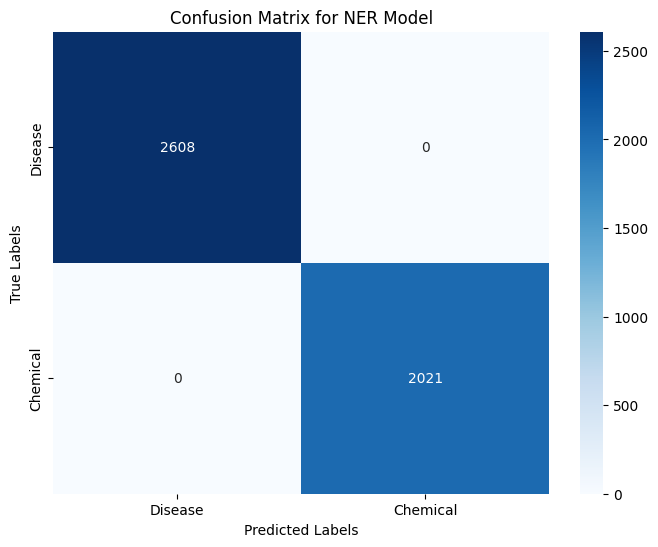

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for NER Model")
plt.show()

In [41]:
print(classification_report(true_labels, pred_labels, target_names=all_labels))

              precision    recall  f1-score   support

     Disease       1.00      1.00      1.00      2021
    Chemical       1.00      1.00      1.00      2608

    accuracy                           1.00      4629
   macro avg       1.00      1.00      1.00      4629
weighted avg       1.00      1.00      1.00      4629



Now we have implemented the Supervised Learning using spacy and now we would attempt to do the same using the active ( unsupervised learning ) 

In [42]:
# Command Line utility to check the code : 

import spacy
import spacy.displacy
nlp = spacy.load('trained_output/model-best')

doc  = nlp(str(input("Enter the text to test the model: ")))
spacy.displacy.render(doc , style  = "ent" , jupyter = True  , options = options)
